In [21]:
import os
import re
import statistics
from src.najdi_rok import najdi_rok
import pandas as pd
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 500)
df = pd.read_parquet("data/cnb_ceska_poezie.parquet")

In [22]:
len(df)

17214

In [23]:
df = df.drop_duplicates(subset=['titul','autorstvo'], keep='first')

In [24]:
len(df)

17214

In [25]:
df = df.merge(pd.read_parquet(os.path.join('data/cnb_sloupce','008.parquet')), left_index=True, right_index=True, how="left")

In [26]:
len(df)

17214

In [27]:
df

,rok,titul,autorstvo,100_7,008
001,,,,,
cpk20051527410,1802.0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ...",S...a F.,None,050317s1802 xr e 000 pdcze
bknvla04792,1802.0,Nowé básně,Puchmajer Antonín Jaroslav,jk01101689,041025s1802 xr e 000 p cze
nkc20061639418,1803.0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...,Vavák František Jan,jk01141705,060123s1803 xr e 000 p cze
cpk20051500789,1804.0,[Přehrozné se mračno hnalo ...,Tomsa František Jan,jk01132744,050222s1804 xr e 000 pdcze
bknhak08849,1804.0,Poslednj Saud,Nejedlý Vojtěch,jk01082969,030503s1804 xr e 000 p cze
...,...,...,...,...,...
nkc20243587118,2024.0,Poezie z předprvního šuplíku,Dvorská Lucie,None,240205s2024 xr g 000 p cze
nkc20243632368,2024.0,Včely vyrobené z tmy,Šuhájek Pavel,osa2013752020,240917s2024 xr a g 000 p cze
nkc20243630870,2024.0,Rozervané řádky,Brabencová Kristýna,xx0322676,240912s2024 xr a g 000 m cze


In [28]:
wikid = pd.read_parquet(os.path.join('data','wikidata.parquet')).reset_index(drop=False).rename(columns={'index':'100_7'})
wikid = wikid[['w_narozeni','w_umrti','100_7']]

In [29]:
df = df.merge(wikid, left_on=["100_7"], right_on=["100_7"], how="left")

In [30]:
df

,rok,titul,autorstvo,100_7,008,w_narozeni,w_umrti
0,1802.0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ...",S...a F.,None,050317s1802 xr e 000 pdcze,NaN,NaN
1,1802.0,Nowé básně,Puchmajer Antonín Jaroslav,jk01101689,041025s1802 xr e 000 p cze,1769.0,1820.0
2,1803.0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...,Vavák František Jan,jk01141705,060123s1803 xr e 000 p cze,1741.0,1818.0
3,1804.0,[Přehrozné se mračno hnalo ...,Tomsa František Jan,jk01132744,050222s1804 xr e 000 pdcze,1753.0,1814.0
4,1804.0,Poslednj Saud,Nejedlý Vojtěch,jk01082969,030503s1804 xr e 000 p cze,1772.0,1844.0
...,...,...,...,...,...,...,...
17209,2024.0,Poezie z předprvního šuplíku,Dvorská Lucie,None,240205s2024 xr g 000 p cze,NaN,NaN
17210,2024.0,Včely vyrobené z tmy,Šuhájek Pavel,osa2013752020,240917s2024 xr a g 000 p cze,1982.0,NaN
17211,2024.0,Rozervané řádky,Brabencová Kristýna,xx0322676,240912s2024 xr a g 000 m cze,NaN,NaN
17212,2024.0,Onajábel,Matoulková Jana,mzk20241220358,240206s2024 xr a g 000 p cze,NaN,NaN


In [31]:
len(df)

17214

In [32]:
stovka = pd.read_parquet(os.path.join('data/cnb_sloupce','100.parquet'))

In [33]:
stovka.shape

(897263, 9)

In [34]:
stovka.info(memory_usage="deep")

<class 'pandas.core.frame.DataFrame'>
Index: 897263 entries, ck8300078 to nkc20243632953
Data columns (total 9 columns):
 #   Column    Non-Null Count   Dtype 
---  ------    --------------   ----- 
 0   100_ind1  897263 non-null  object
 1   100_a     897262 non-null  object
 2   100_7     828711 non-null  object
 3   100_4     897050 non-null  object
 4   100_d     682495 non-null  object
 5   100_q     4784 non-null    object
 6   100_c     3810 non-null    object
 7   100_b     355 non-null     object
 8   100_e     1 non-null       object
dtypes: object(9)
memory usage: 442.1 MB


In [35]:
stovka = stovka.drop_duplicates(subset=['100_7'])
stovka.shape

(171304, 9)

In [36]:
df = df.merge(stovka, on=['100_7'], how="left")

In [37]:
df[df['100_d'].notnull()]

,rok,titul,autorstvo,100_7,008,w_narozeni,w_umrti,100_ind1,100_a,100_4,100_d,100_q,100_c,100_b,100_e
1,1802.0,Nowé básně,Puchmajer Antonín Jaroslav,jk01101689,041025s1802 xr e 000 p cze,1769.0,1820.0,1,"Puchmajer, Antonín Jaroslav,",[aut],1769-1820,None,None,None,None
2,1803.0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...,Vavák František Jan,jk01141705,060123s1803 xr e 000 p cze,1741.0,1818.0,1,"Vavák, František Jan,",[aut],1741-1816,None,None,None,None
3,1804.0,[Přehrozné se mračno hnalo ...,Tomsa František Jan,jk01132744,050222s1804 xr e 000 pdcze,1753.0,1814.0,1,"Tomsa, František Jan,",[aut],1753-1814,None,None,None,None
4,1804.0,Poslednj Saud,Nejedlý Vojtěch,jk01082969,030503s1804 xr e 000 p cze,1772.0,1844.0,1,"Nejedlý, Vojtěch,",[aut],1772-1844,None,None,None,None
5,1805.0,Děwjn,Hněvkovský Šebestián,jk01041385,020120s1805 xr e 000 p cze,1770.0,1847.0,1,"Hněvkovský, Šebestián,",[aut],1770-1847,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17208,2024.0,Ať žije královna!,Král Robin,jo2007399814,240409s2024 xr a b 000 p cze,1981.0,NaN,1,"Král, Robin,",[aut],1981-,None,None,None,None
17210,2024.0,Včely vyrobené z tmy,Šuhájek Pavel,osa2013752020,240917s2024 xr a g 000 p cze,1982.0,NaN,1,"Šuhájek, Pavel,",[aut],1982-,None,None,None,None
17211,2024.0,Rozervané řádky,Brabencová Kristýna,xx0322676,240912s2024 xr a g 000 m cze,NaN,NaN,1,"Brabencová, Kristýna,",[aut],2003-,None,None,None,None
17212,2024.0,Onajábel,Matoulková Jana,mzk20241220358,240206s2024 xr a g 000 p cze,NaN,NaN,1,"Matoulková, Jana,","[aut, ill, pbl]",1958-,None,None,None,None


In [38]:
df

,rok,titul,autorstvo,100_7,008,w_narozeni,w_umrti,100_ind1,100_a,100_4,100_d,100_q,100_c,100_b,100_e
0,1802.0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ...",S...a F.,None,050317s1802 xr e 000 pdcze,NaN,NaN,1,"Valouch, Josef",[aut],None,None,None,None,None
1,1802.0,Nowé básně,Puchmajer Antonín Jaroslav,jk01101689,041025s1802 xr e 000 p cze,1769.0,1820.0,1,"Puchmajer, Antonín Jaroslav,",[aut],1769-1820,None,None,None,None
2,1803.0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...,Vavák František Jan,jk01141705,060123s1803 xr e 000 p cze,1741.0,1818.0,1,"Vavák, František Jan,",[aut],1741-1816,None,None,None,None
3,1804.0,[Přehrozné se mračno hnalo ...,Tomsa František Jan,jk01132744,050222s1804 xr e 000 pdcze,1753.0,1814.0,1,"Tomsa, František Jan,",[aut],1753-1814,None,None,None,None
4,1804.0,Poslednj Saud,Nejedlý Vojtěch,jk01082969,030503s1804 xr e 000 p cze,1772.0,1844.0,1,"Nejedlý, Vojtěch,",[aut],1772-1844,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17209,2024.0,Poezie z předprvního šuplíku,Dvorská Lucie,None,240205s2024 xr g 000 p cze,NaN,NaN,1,"Valouch, Josef",[aut],None,None,None,None,None
17210,2024.0,Včely vyrobené z tmy,Šuhájek Pavel,osa2013752020,240917s2024 xr a g 000 p cze,1982.0,NaN,1,"Šuhájek, Pavel,",[aut],1982-,None,None,None,None
17211,2024.0,Rozervané řádky,Brabencová Kristýna,xx0322676,240912s2024 xr a g 000 m cze,NaN,NaN,1,"Brabencová, Kristýna,",[aut],2003-,None,None,None,None
17212,2024.0,Onajábel,Matoulková Jana,mzk20241220358,240206s2024 xr a g 000 p cze,NaN,NaN,1,"Matoulková, Jana,","[aut, ill, pbl]",1958-,None,None,None,None


In [39]:
def narozeni(radek):
    if radek['100_d'] != None:
        if '-' in str(radek['100_d']):
            if len(radek['100_d'].split('-')[0]) == 4:
                return pd.to_numeric(radek['100_d'].split('-')[0])
    elif radek['w_narozeni'] != None:
        return pd.to_numeric(radek['w_narozeni'])

In [40]:
def umrti(radek):
    if radek['100_d'] != None:
        if '-' in str(radek['100_d']):
            if len(radek['100_d'].split('-')[1]) == 4:
                return pd.to_numeric(radek['100_d'].split('-')[1])
    elif radek['w_umrti'] != None:
        return pd.to_numeric(radek['w_umrti'])

In [41]:
df['narozeni'] = df.apply(lambda row: narozeni(row), axis=1)
df['umrti'] = df.apply(lambda row: umrti(row), axis=1)

In [42]:
df

,rok,titul,autorstvo,100_7,008,w_narozeni,w_umrti,100_ind1,100_a,100_4,100_d,100_q,100_c,100_b,100_e,narozeni,umrti
0,1802.0,"Pjseň Pánu, Panu Jozefowi Wimmrowi, Wlastency ...",S...a F.,None,050317s1802 xr e 000 pdcze,NaN,NaN,1,"Valouch, Josef",[aut],None,None,None,None,None,NaN,NaN
1,1802.0,Nowé básně,Puchmajer Antonín Jaroslav,jk01101689,041025s1802 xr e 000 p cze,1769.0,1820.0,1,"Puchmajer, Antonín Jaroslav,",[aut],1769-1820,None,None,None,None,1769.0,1820.0
2,1803.0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...,Vavák František Jan,jk01141705,060123s1803 xr e 000 p cze,1741.0,1818.0,1,"Vavák, František Jan,",[aut],1741-1816,None,None,None,None,1741.0,1816.0
3,1804.0,[Přehrozné se mračno hnalo ...,Tomsa František Jan,jk01132744,050222s1804 xr e 000 pdcze,1753.0,1814.0,1,"Tomsa, František Jan,",[aut],1753-1814,None,None,None,None,1753.0,1814.0
4,1804.0,Poslednj Saud,Nejedlý Vojtěch,jk01082969,030503s1804 xr e 000 p cze,1772.0,1844.0,1,"Nejedlý, Vojtěch,",[aut],1772-1844,None,None,None,None,1772.0,1844.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17209,2024.0,Poezie z předprvního šuplíku,Dvorská Lucie,None,240205s2024 xr g 000 p cze,NaN,NaN,1,"Valouch, Josef",[aut],None,None,None,None,None,NaN,NaN
17210,2024.0,Včely vyrobené z tmy,Šuhájek Pavel,osa2013752020,240917s2024 xr a g 000 p cze,1982.0,NaN,1,"Šuhájek, Pavel,",[aut],1982-,None,None,None,None,1982.0,NaN
17211,2024.0,Rozervané řádky,Brabencová Kristýna,xx0322676,240912s2024 xr a g 000 m cze,NaN,NaN,1,"Brabencová, Kristýna,",[aut],2003-,None,None,None,None,2003.0,NaN
17212,2024.0,Onajábel,Matoulková Jana,mzk20241220358,240206s2024 xr a g 000 p cze,NaN,NaN,1,"Matoulková, Jana,","[aut, ill, pbl]",1958-,None,None,None,None,1958.0,NaN


In [65]:
df['vek'] = df['rok'] - df['narozeni']

<Axes: ylabel='Frequency'>

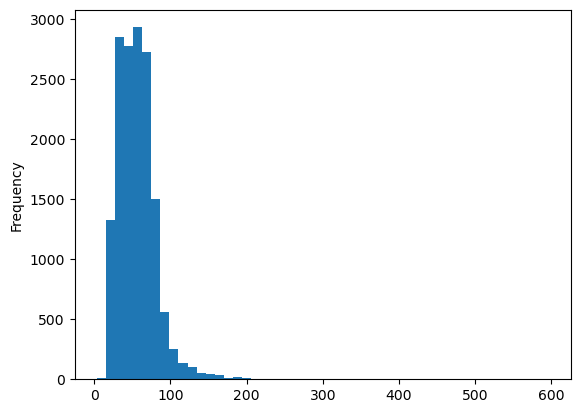

In [71]:
df['vek'].plot.hist(bins=50)

In [77]:
df = df[(df['rok'] < df['umrti']) | (df['umrti'].isnull() & (df['vek'] < df['umrti'].median()))]

In [79]:
df

,rok,titul,autorstvo,100_7,008,w_narozeni,w_umrti,100_ind1,100_a,100_4,100_d,100_q,100_c,100_b,100_e,narozeni,umrti,vek
1,1802.0,Nowé básně,Puchmajer Antonín Jaroslav,jk01101689,041025s1802 xr e 000 p cze,1769.0,1820.0,1,"Puchmajer, Antonín Jaroslav,",[aut],1769-1820,None,None,None,None,1769.0,1820.0,33.0
2,1803.0,Spěw Kwerků Kuttnohorských wzbuzugicý k pawowá...,Vavák František Jan,jk01141705,060123s1803 xr e 000 p cze,1741.0,1818.0,1,"Vavák, František Jan,",[aut],1741-1816,None,None,None,None,1741.0,1816.0,62.0
3,1804.0,[Přehrozné se mračno hnalo ...,Tomsa František Jan,jk01132744,050222s1804 xr e 000 pdcze,1753.0,1814.0,1,"Tomsa, František Jan,",[aut],1753-1814,None,None,None,None,1753.0,1814.0,51.0
4,1804.0,Poslednj Saud,Nejedlý Vojtěch,jk01082969,030503s1804 xr e 000 p cze,1772.0,1844.0,1,"Nejedlý, Vojtěch,",[aut],1772-1844,None,None,None,None,1772.0,1844.0,32.0
5,1805.0,Děwjn,Hněvkovský Šebestián,jk01041385,020120s1805 xr e 000 p cze,1770.0,1847.0,1,"Hněvkovský, Šebestián,",[aut],1770-1847,None,None,None,None,1770.0,1847.0,35.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17208,2024.0,Ať žije královna!,Král Robin,jo2007399814,240409s2024 xr a b 000 p cze,1981.0,NaN,1,"Král, Robin,",[aut],1981-,None,None,None,None,1981.0,NaN,43.0
17210,2024.0,Včely vyrobené z tmy,Šuhájek Pavel,osa2013752020,240917s2024 xr a g 000 p cze,1982.0,NaN,1,"Šuhájek, Pavel,",[aut],1982-,None,None,None,None,1982.0,NaN,42.0
17211,2024.0,Rozervané řádky,Brabencová Kristýna,xx0322676,240912s2024 xr a g 000 m cze,NaN,NaN,1,"Brabencová, Kristýna,",[aut],2003-,None,None,None,None,2003.0,NaN,21.0
17212,2024.0,Onajábel,Matoulková Jana,mzk20241220358,240206s2024 xr a g 000 p cze,NaN,NaN,1,"Matoulková, Jana,","[aut, ill, pbl]",1958-,None,None,None,None,1958.0,NaN,66.0


<Axes: ylabel='Frequency'>

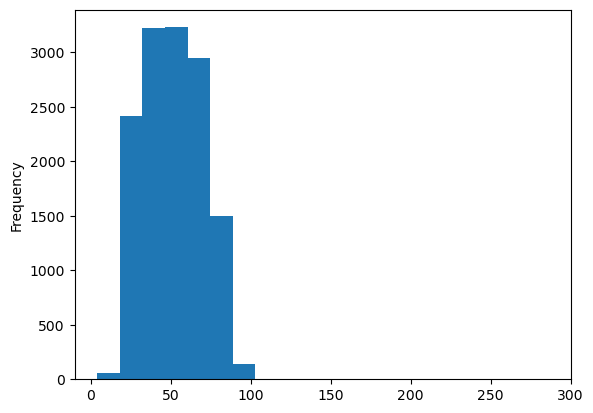

In [81]:
df['vek'].plot.hist(bins=20)

<Axes: xlabel='rok'>

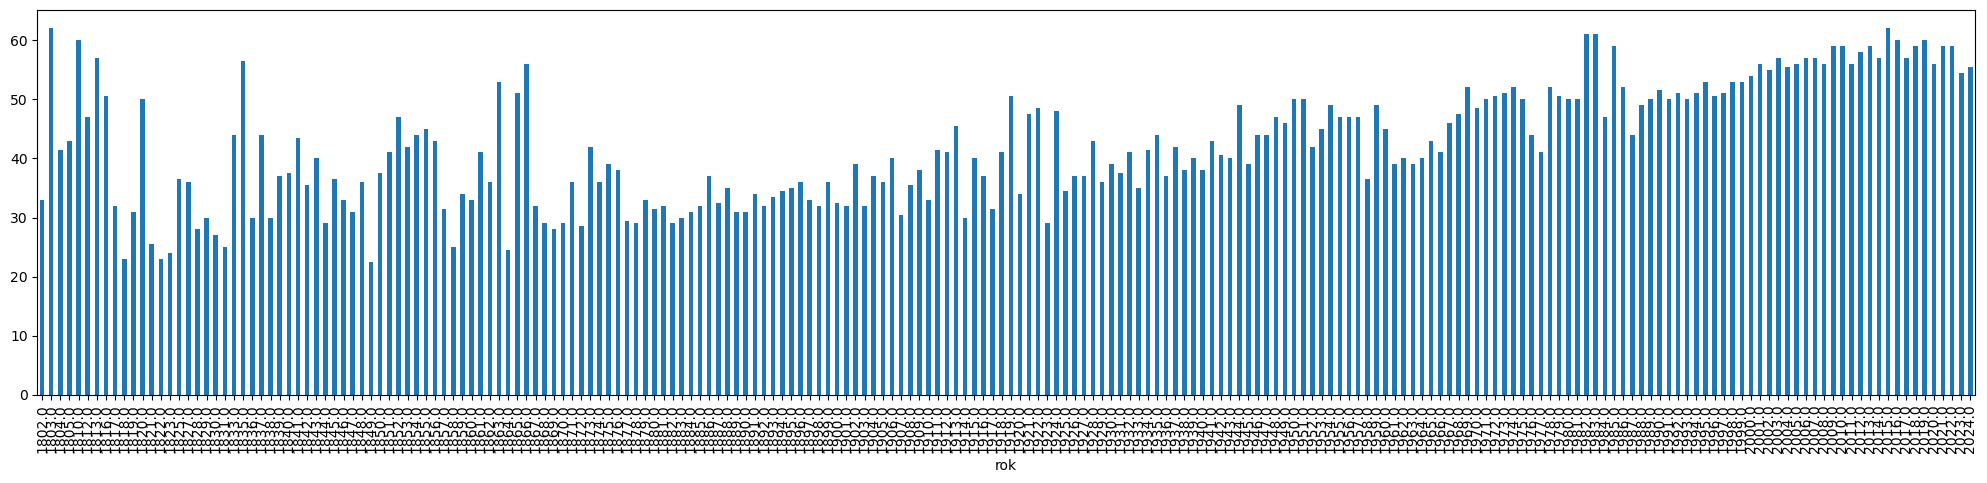

In [85]:
df.groupby('rok')['vek'].median().plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

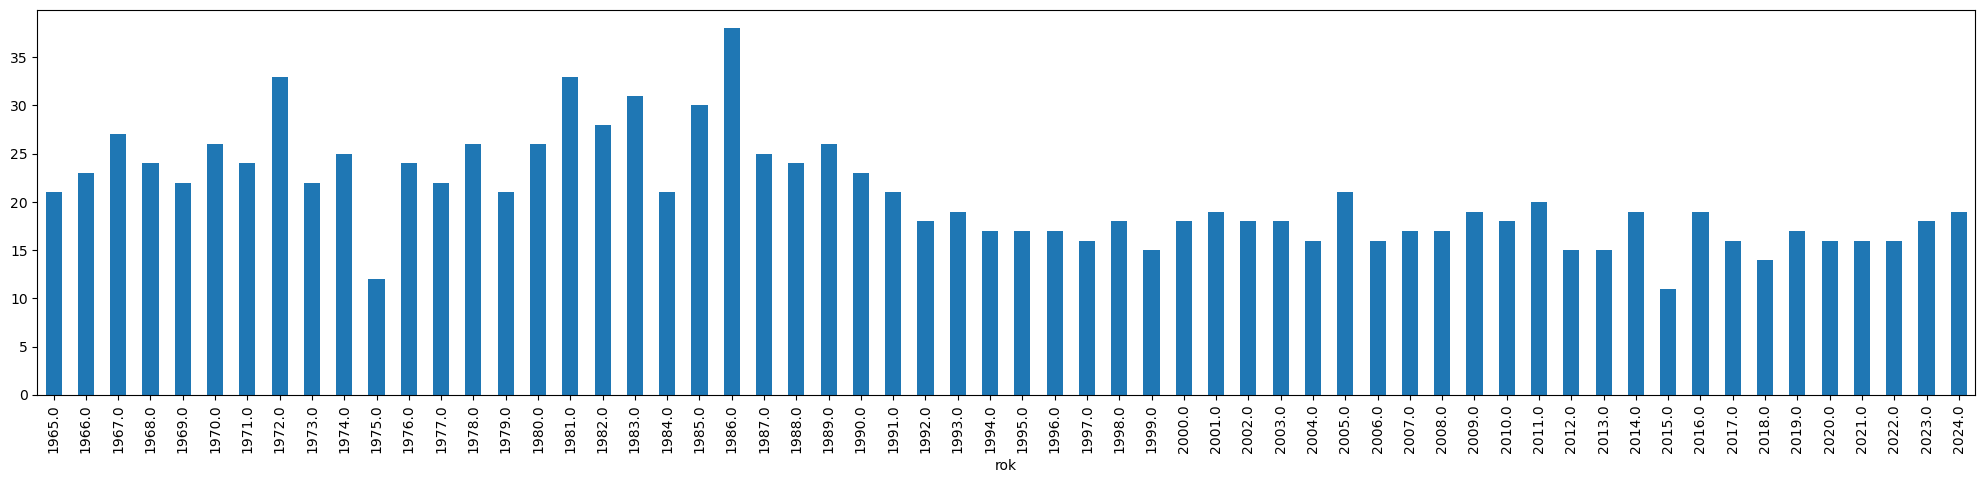

In [89]:
df.groupby('rok')['vek'].min().tail(60).plot.bar(figsize=(25,5))

<Axes: xlabel='rok'>

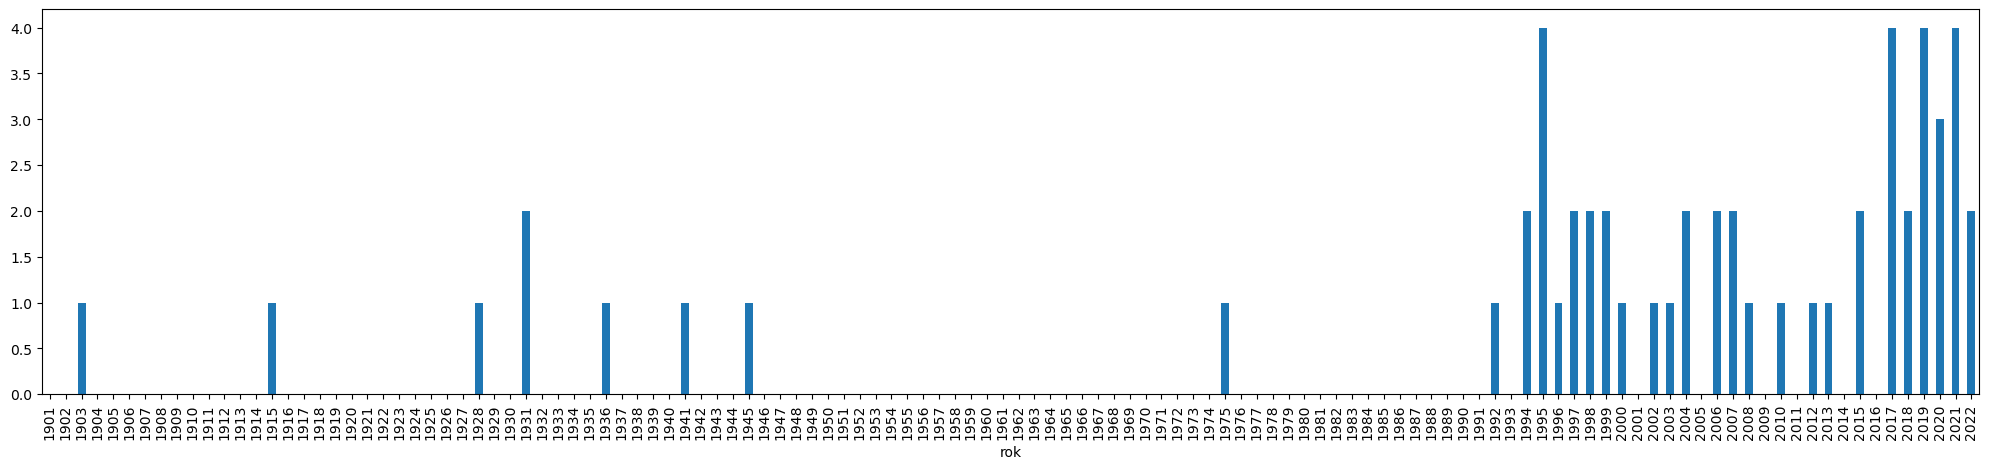

In [95]:
df[df['vek'] <= 18].groupby('rok').size().reindex([n for n in range(1901,2023)]).plot.bar(figsize=(25,5))